# tải dữ liệu


In [2]:
import tabml.datasets
df_dict = tabml.datasets.download_movielen_1m()
df_dict.keys()
#tải dữ liệu


dict_keys(['users', 'movies', 'ratings'])

dict_keys(['users', 'movies', 'ratings'])

# khám phá dữ liệu

## rating

In [3]:
ratings = df_dict["ratings"]
ratings.head(10)
#10 dòng đầu tiên của dataframe rating.

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


<Axes: ylabel='Frequency'>

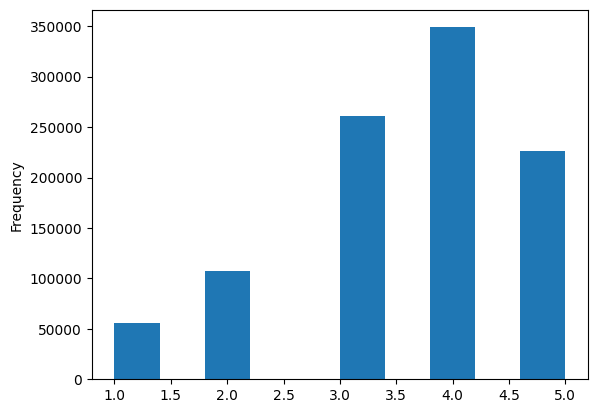

In [4]:
ratings["Rating"].plot.hist()
#Phân phối của các điểm đánh giá

In [5]:
ratings["UserID"].value_counts()
#ố lượng bộ phim mà mỗi người dùng đánh giá cũng như số lượng đánh giá mà mỗi bộ phim nhận

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: count, Length: 6040, dtype: int64

In [6]:
ratings["MovieID"].value_counts()
# số lượng đnáh giá mỗi bộ phim

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64

## Dữ liệu người dùng

In [7]:
users = df_dict["users"]
users.info()
# dữ liệu người đùng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
users["Gender"].value_counts()
# giới tính ng dùng

Gender
M    4331
F    1709
Name: count, dtype: int64

<Axes: >

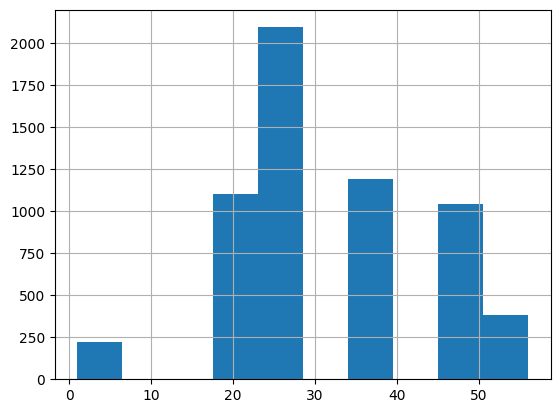

In [9]:
users["Age"].hist()
# tuổi người dùng

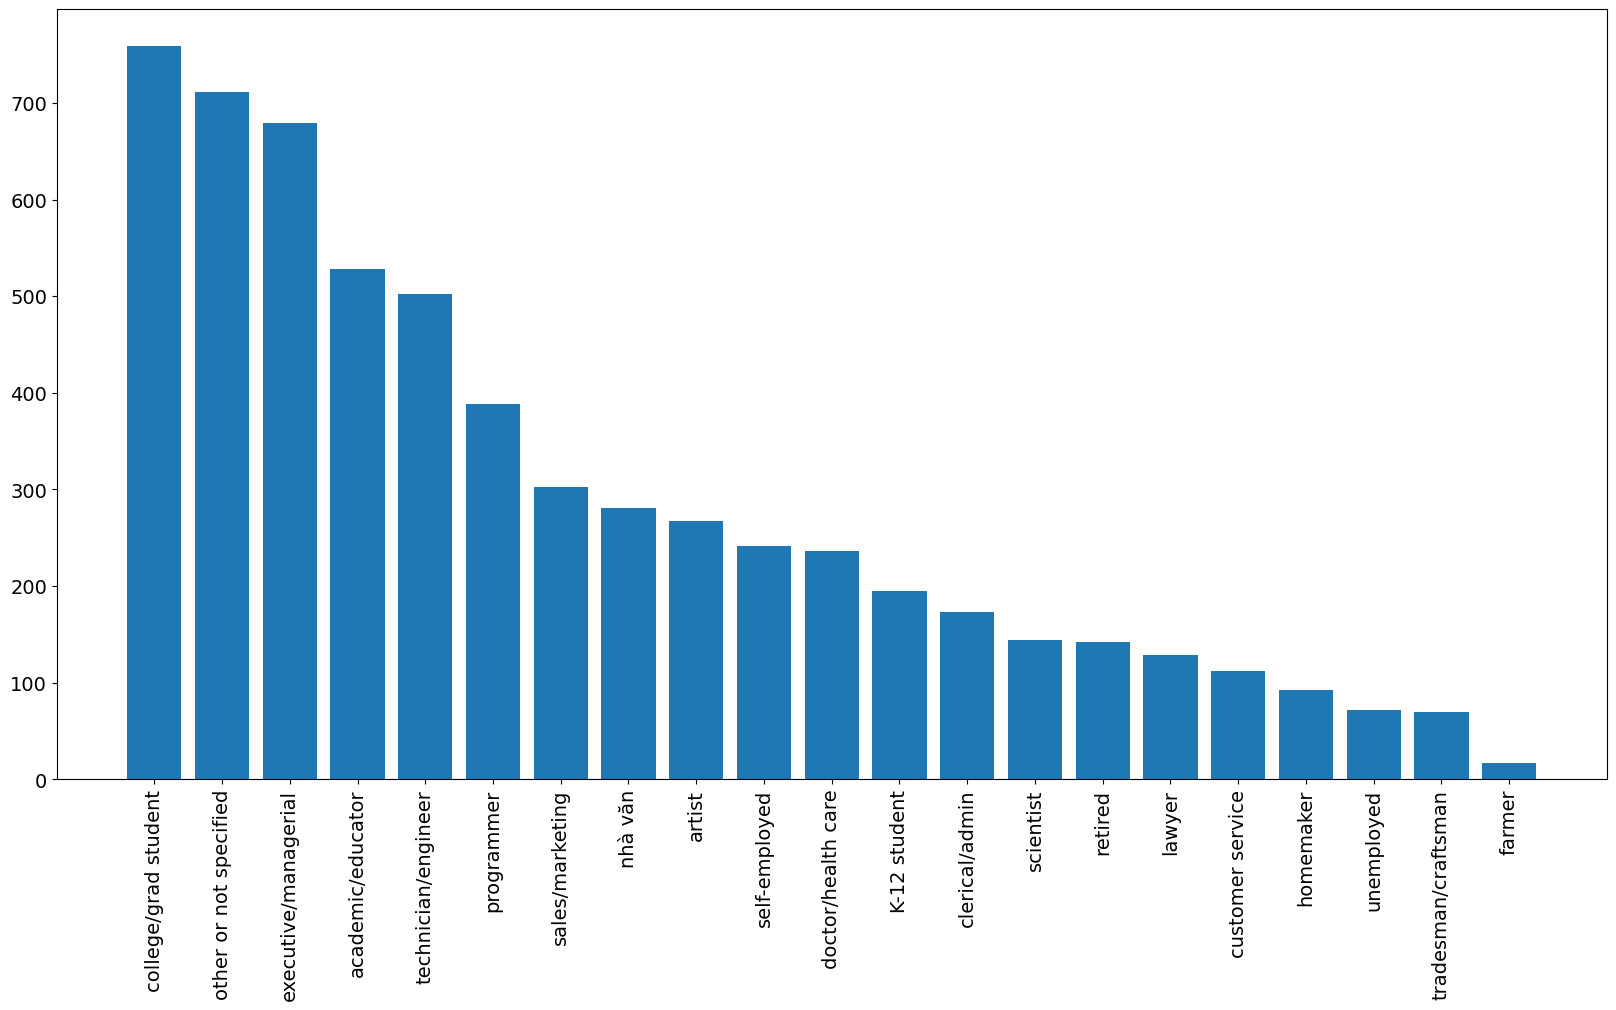

In [10]:
import matplotlib
from matplotlib import pyplot as plt


occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "nhà văn",
}

occupation_id_count = users["Occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=90)
plt.show()

## Dữ liệu bộ phim

In [11]:
movies = df_dict["movies"]
movies.info()
# dữ liệu phim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
movies.head(10)
#10 dòng đầu datafram movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [13]:
movies["num_genres"] = movies["Genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()

num_genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

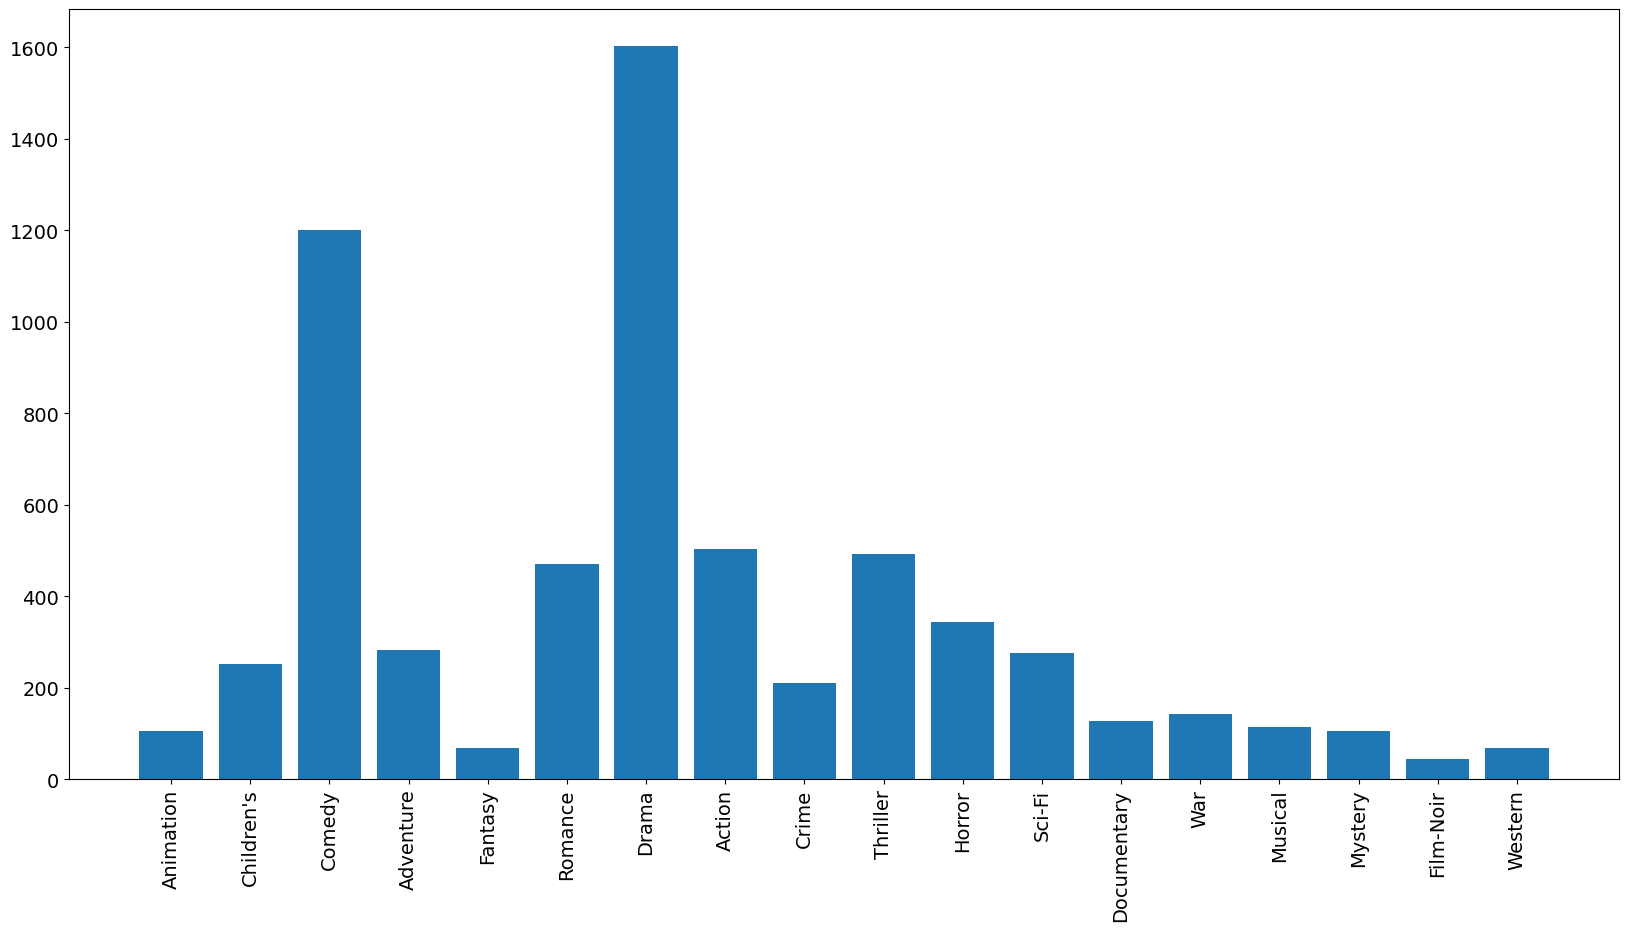

In [14]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["Genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1

plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=90)
plt.show();

## Tải và phân chia dữ liệu

In [15]:
import pandas as pd
import tabml.datasets
from sklearn.model_selection import train_test_split

df_dict = tabml.datasets.download_movielen_1m()
users, movies, ratings = df_dict["users"], df_dict["movies"], df_dict["ratings"]

train_ratings, validation_ratings = train_test_split(
    ratings, test_size=0.1, random_state=42
)

In [16]:
users_in_validation = validation_ratings["UserID"].unique()
all_users = users["UserID"].unique()

print(f"There are {len(users_in_validation)} users in validation set.")
print(f"Total number of users: {len(all_users)}")

There are 5970 users in validation set.
Total number of users: 6040


## Xây dựng đặc trưng cho các bộ phim

In [17]:
movie_index_by_id = {id: i for i, id in enumerate(movies["MovieID"])}

In [18]:
genres = [
    "Action",
    "Adventure",
    "Animation",
    "Children's",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]
genre_index_by_name = {name:i for i, name in enumerate(genres)}

import numpy as np
# build binary array for movie genres
movie_features = np.zeros((len(movies), len(genres)))
for i, movie_genres in enumerate(movies["Genres"]):
    for genre in movie_genres.split("|"):
        genre_index = genre_index_by_name[genre]
        movie_features[i, genre_index] = 1

##Huấn luyện mô hình

In [19]:
from sklearn.linear_model import Ridge


def train_user_model(user_id):
    user_ratings = train_ratings[train_ratings["UserID"] == user_id]
    movie_indexes = [
        movie_index_by_id[movie_id] for movie_id in user_ratings["MovieID"]
    ]
    train_data = movie_features[movie_indexes]
    train_label = user_ratings["Rating"]
    model = Ridge(alpha=0.1)
    model.fit(train_data, train_label)
    return model


# build model for each user
user_model_dict = {}
for user_id in users["UserID"].unique():
    user_model_dict[user_id] = train_user_model(user_id)

In [20]:
def predict(user_id, movie_id):
    movie_feature = movie_features[movie_index_by_id[movie_id]].reshape((1, -1))
    pred = user_model_dict[user_id].predict(movie_feature)
    return min(max(pred, 1), 5)

In [21]:
from sklearn.metrics import mean_squared_error

def eval_rmse(ratings: pd.DataFrame) -> float:
    predictions = np.zeros(len(ratings))
    for index, row in enumerate(ratings.itertuples(index=False)):
        predictions[index] = predict(row[0], row[1])
    rmse = mean_squared_error(ratings["Rating"], predictions, squared=False)
    return rmse

print(f"RMSE train: {eval_rmse(train_ratings)}")
print(f"RMSE validation: {eval_rmse(validation_ratings)}")

RMSE train: 0.9298923151317949
RMSE validation: 1.0423634495127465


##Kiểm tra kết quả

In [22]:
user_id = 160
for genre, coef in zip(genres, user_model_dict[user_id].coef_):
    print("{:15s}: {:.3f}".format(genre, coef))

Action         : -0.308
Adventure      : 0.710
Animation      : 0.198
Children's     : -0.199
Comedy         : -0.712
Crime          : 0.332
Documentary    : 0.000
Drama          : 0.225
Fantasy        : -0.396
Film-Noir      : 0.000
Horror         : 0.050
Musical        : 0.198
Mystery        : 0.000
Romance        : 0.771
Sci-Fi         : -0.373
Thriller       : -0.838
War            : -1.439
Western        : 0.000


In [23]:
user_model_dict[user_id].intercept_

3.7828911474465783